<a href="https://colab.research.google.com/github/Malek1Alk7alil2/Quiz1/blob/main/Naive_Bayes_Classifier_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/adult.csv')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import  classification_report, ConfusionMatrixDisplay

In [ ]:
data['interaction_Education Num_Hours/Week'] = data['Education Num'] * data['Hours/Week']
data['interaction_Education Num_Age'] = data['Education Num'] * data['Age']

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Age                                   32561 non-null  int64 
 1   Workclass                             32561 non-null  object
 2   fnlgwt                                32561 non-null  int64 
 3   Education                             32561 non-null  object
 4   Education Num                         32561 non-null  int64 
 5   Marital Status                        32561 non-null  object
 6   Occupation                            32561 non-null  object
 7   Relationship                          32561 non-null  object
 8   Race                                  32561 non-null  object
 9   Sex                                   32561 non-null  object
 10  Capital Gain                          32561 non-null  int64 
 11  Capital Loss                

In [ ]:
data['Above/Below 50k'].value_counts()

,count
Above/Below 50k,
<=50K,24720
>50K,7841


In [ ]:
'''data['Above/Below 50k'] = data['Above/Below 50k'].map({'<=50K': 0, '>50K': 1})'''

In [ ]:
data['Above/Below 50k'].value_counts()

,count
Above/Below 50k,
<=50K,24720
>50K,7841


In [ ]:
data['interaction_Education_Num_Hours/Week'] = data['Education Num'] * data['Hours/Week']
data['interaction_Education_Num_Age'] = data['Education Num'] * data['Age']

In [ ]:
features = ['interaction_Education_Num_Hours/Week','interaction_Education_Num_Age', 'Capital Gain' , 'fnlgwt']
x = data.drop('Above/Below 50k', axis=1)
y = data['Above/Below 50k']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle = True)

print(f"Data size: {len(x)}\nTraining data size: {len(x_train)}\nTesting data size: {len(x_test)}")

Data size: 32561
Training data size: 26048
Testing data size: 6513


In [ ]:
# preprocessing
scaler = StandardScaler()

# Select only numerical features for scaling
numerical_features = x_train.select_dtypes(include=['number']).columns

# Fit and transform on numerical features only
x_train_transformed = scaler.fit_transform(x_train[numerical_features])
x_test_transformed = scaler.transform(x_test[numerical_features])

In [ ]:
smote = SMOTE(random_state=42)
x_train_smote, y_train_smote = smote.fit_resample(x_train_transformed, y_train)

'''rus = RandomUnderSampler(random_state=42)
X_train_balanced, y_train_balanced = rus.fit_resample(x_train, y_train)'''

# Check the class distribution after SMOTE
'''print("Class distribution after SMOTE:", y_train_balanced.value_counts())'''

nb = GaussianNB()
nb.fit(x_train_transformed, y_train)
y_hat_nb = nb.predict(x_test_transformed)

acc = accuracy_score(y_test, y_hat_nb)
print(f"Model accuracy was {acc*100:.2f}%")

report = classification_report(y_test, y_hat_nb)
print(report)

Model accuracy was 81.36%
              precision    recall  f1-score   support

       <=50K       0.85      0.91      0.88      4956
        >50K       0.64      0.51      0.57      1557

    accuracy                           0.81      6513
   macro avg       0.75      0.71      0.72      6513
weighted avg       0.80      0.81      0.81      6513



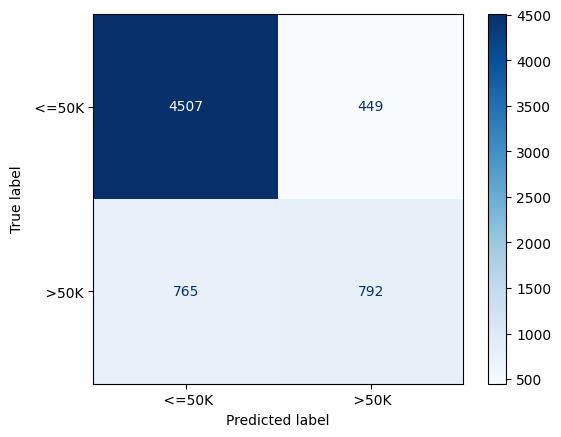

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_hat_nb, cmap=plt.cm.Blues)
plt.show()